# Xarray Demo

## 1. Data structures

### numpy.array

In [1]:
import numpy as np

Define a 2x3 array

In [2]:
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

Get the value at 2nd row and 3rd column

In [3]:
a[1, 2]

4

Compute the mean column-wise

In [4]:
a.mean(axis=0)

array([ 1.5,  5.5,  6.5])

Not well supported by numpy:

- array dimensions and indexes often have a meaning, e.g., latitude / longitude and their coordinates.

### xarray.DataArray

A `xarray.DataArray` is a N-dimensional array (numpy-like) with dimensions, coordinates (optional) and metadata attributes (optional).

In [5]:
import xarray as xr

Take the data defined in the numpy array above and add dimension names and labels

In [6]:
da = xr.DataArray(a, dims=['latitude', 'longitude'],
                  coords={'longitude': [11, 12, 13], 'latitude': [1, 2]})
da

<xarray.DataArray (latitude: 2, longitude: 3)>
array([[1, 3, 9],
       [2, 8, 4]])
Coordinates:
  * longitude  (longitude) int64 11 12 13
  * latitude   (latitude) int64 1 2

Now we can work directly with coordinate values...

In [7]:
da.sel(longitude=13, latitude=2)

<xarray.DataArray ()>
array(4)
Coordinates:
    longitude  int64 13
    latitude   int64 2

...and dimension names

In [8]:
da.mean(dim='latitude')

<xarray.DataArray (longitude: 3)>
array([ 1.5,  5.5,  6.5])
Coordinates:
  * longitude  (longitude) int64 11 12 13

when using a `DataArray`, no need to know which dimension numbers refer to `latitude` and `longitude` respectively

In [9]:
a.transpose().mean(axis=0)             # dimension 0 of the numpy array has changed 

array([ 4.33333333,  4.66666667])

In [10]:
da.transpose().mean(dim='latitude')    # 'latitude' still refers to the same dimension

<xarray.DataArray (longitude: 3)>
array([ 1.5,  5.5,  6.5])
Coordinates:
  * longitude  (longitude) int64 11 12 13

Still possible to access the underlying numpy array

In [11]:
da.values

array([[1, 3, 9],
       [2, 8, 4]])

### xarray.Dataset

A `xarray.Dataset` has dimensions, coordinate variables, data variables and attributes (all optional). It can be:

- a collection of `xarray.DataArray` objects that have dimensions and coordinates in common. 
- the content of a netCDF file...

In [12]:
ds = xr.open_dataset('ERA-Interim-MonthlyAvg-TUVP.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 457)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sp         (time, latitude, longitude) float64 1.028e+05 1.028e+05 ...
    u10        (time, latitude, longitude) float64 -1.857 -1.854 -1.851 ...
    v10        (time, latitude, longitude) float64 -0.3266 -0.3056 -0.285 ...
    t2m        (time, latitude, longitude) float64 242.7 242.7 242.7 242.7 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-04-19 16:02:16 GMT by grib_to_netcdf-2.1.0: grib_to_ne...

dict-like or attribute style access to data variables and coordinates

In [13]:
ds.t2m

<xarray.DataArray 't2m' (time: 457, latitude: 241, longitude: 480)>
[52865760 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Attributes:
    units:      K
    long_name:  2 metre temperature

In [14]:
ds['longitude']

<xarray.DataArray 'longitude' (longitude: 480)>
array([   0.  ,    0.75,    1.5 , ...,  357.75,  358.5 ,  359.25], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
Attributes:
    units:      degrees_east
    long_name:  longitude

## 2. Analytics

### Indexing

By label (coordinate) value

In [15]:
ds.sel(latitude=45)

<xarray.Dataset>
Dimensions:    (longitude: 480, time: 457)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
    latitude   float32 45.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sp         (time, longitude) float64 1.004e+05 9.919e+04 9.694e+04 ...
    u10        (time, longitude) float64 -0.2519 -0.2647 -0.2836 -0.1528 ...
    v10        (time, longitude) float64 0.7041 0.8611 0.9237 0.8686 0.6009 ...
    t2m        (time, longitude) float64 277.6 277.2 276.0 274.4 273.1 272.7 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-04-19 16:02:16 GMT by grib_to_netcdf-2.1.0: grib_to_ne...

Nearest neighbor lookup, e.g., get the data of the grid cell in which my station is located 

In [16]:
ds.sel(latitude=47.2876, longitude=11.3788, method='nearest')

<xarray.Dataset>
Dimensions:    (time: 457)
Coordinates:
    longitude  float32 11.25
    latitude   float32 47.25
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sp         (time) float64 8.419e+04 8.41e+04 8.422e+04 8.441e+04 ...
    u10        (time) float64 0.8787 0.1095 0.7023 0.3623 0.3087 0.2992 ...
    v10        (time) float64 0.6971 0.5583 1.079 -0.04204 0.6298 -0.2448 ...
    t2m        (time) float64 265.4 270.6 273.2 273.7 280.6 284.4 284.9 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-04-19 16:02:16 GMT by grib_to_netcdf-2.1.0: grib_to_ne...

Provide positional indexes like numpy, e.g., get the (i=0, j=2) grid cell 

In [17]:
ds.isel(latitude=0, longitude=2)

<xarray.Dataset>
Dimensions:    (time: 457)
Coordinates:
    longitude  float32 1.5
    latitude   float32 90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sp         (time) float64 1.028e+05 1.019e+05 1.031e+05 1.026e+05 ...
    u10        (time) float64 -1.851 -1.047 -5.293 1.571 -1.084 -0.4297 1.52 ...
    v10        (time) float64 -0.285 0.4415 2.82 -1.535 -1.752 -1.035 0.991 ...
    t2m        (time) float64 242.7 238.6 245.2 250.5 263.4 272.5 274.2 ...
Attributes:
    Conventions:  CF-1.6
    history:      2017-04-19 16:02:16 GMT by grib_to_netcdf-2.1.0: grib_to_ne...

Indexing a `xarray.DataArray` just like numpy

In [18]:
ds.t2m[:, 0, 2]

<xarray.DataArray 't2m' (time: 457)>
array([ 242.694586,  238.560297,  245.174109, ...,  261.786563,  255.316339,
        250.903628])
Coordinates:
    longitude  float32 1.5
    latitude   float32 90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Attributes:
    units:      K
    long_name:  2 metre temperature

### Aggregation

In [19]:
global_avg_simple = ds.mean(dim=['latitude', 'longitude'])
global_avg_simple

<xarray.Dataset>
Dimensions:  (time: 457)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Data variables:
    sp       (time) float64 9.673e+04 9.667e+04 9.668e+04 9.67e+04 9.663e+04 ...
    u10      (time) float64 -0.1069 0.02902 -0.1717 -0.1011 0.001793 0.09216 ...
    v10      (time) float64 -0.2489 -0.0867 -0.1123 0.0739 0.1937 0.4532 ...
    t2m      (time) float64 276.7 275.3 276.0 277.0 278.7 280.3 280.3 280.2 ...

In [20]:
# weighted average on a spherical Earth
weight = np.cos(np.deg2rad(ds.latitude))
weight = weight / weight.sum()
# average over longitudes first (no need to weight those)
zonal_avg = ds.mean(dim='longitude')
# then weight the lat average
global_avg = (zonal_avg * weight).sum(dim='latitude')

### Groupby

Compute the monthly average over the whole time span, for every grid cell

In [21]:
month_avg = ds.groupby('time.month').mean(dim='time')
month_avg

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, month: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 87.0 86.25 85.5 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sp         (month, latitude, longitude) float64 1.014e+05 1.014e+05 ...
    u10        (month, latitude, longitude) float64 -1.982 -1.987 -1.992 ...
    v10        (month, latitude, longitude) float64 -0.7036 -0.678 -0.6526 ...
    t2m        (month, latitude, longitude) float64 246.1 246.1 246.1 246.1 ...

### Arithmetic

Xarray supports broadcasting

In [22]:
time = xr.DataArray([0, 2, 4], dims='time',
                    coords={'time': np.arange(3)})
space = xr.DataArray([0, 1, 2, 3], dims='space',
                     coords={'space': np.arange(4)})
time + space

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [2, 3, 4, 5],
       [4, 5, 6, 7]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

Xarray also supports alignment

In [23]:
a = xr.DataArray([2, 3, 4, 1, 0, 5], dims='year',
                 coords={'year': [2000, 2001, 2002, 2003, 2004, 2005]})
b = xr.DataArray([3, 4, 2, 3, 1, 0, 3], dims='year',
                 coords={'year': [2002, 2003, 2004, 2005, 2006, 2007, 2008]})
a + b

<xarray.DataArray (year: 4)>
array([7, 5, 2, 8])
Coordinates:
  * year     (year) int64 2002 2003 2004 2005

## 3. Plotting

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline

Plot type, labels and colormaps are inferred from data and its labels.

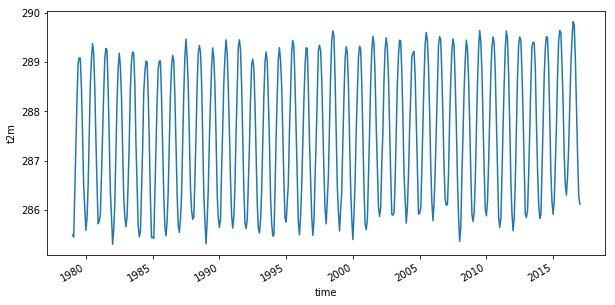

In [25]:
global_avg.t2m.plot(figsize=(10, 5))

Xarray also supports maps (using [cartopy](http://scitools.org.uk/cartopy/))

/Users/bbovy/miniconda3/envs/xarray_demo_py36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1539: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


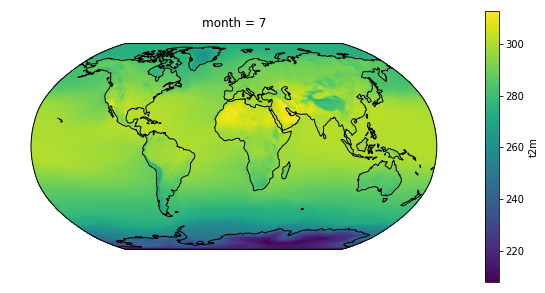

In [26]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.Robinson())

month_avg.t2m.sel(month=7).plot(ax=ax, transform=ccrs.PlateCarree());

ax.coastlines();

Facet plots example

/Users/bbovy/miniconda3/envs/xarray_demo_py36/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1539: RuntimeWarning: invalid value encountered in greater
  to_mask = ((np.abs(dx_horizontal) > np.pi / 2) |


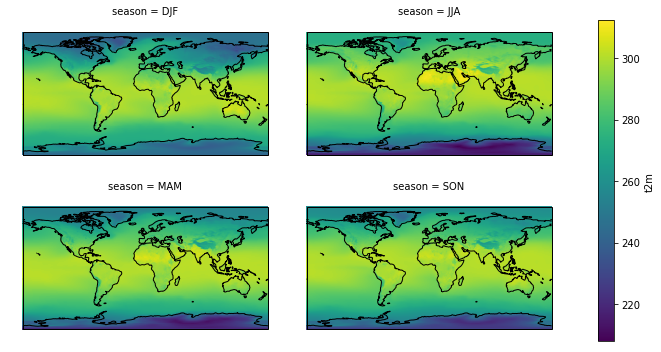

In [27]:
season_avg = ds.groupby('time.season').mean(dim='time')

p = season_avg.t2m.plot(x='longitude', y='latitude', col='season',
                        col_wrap=2, figsize=(10, 5),
                        transform=ccrs.PlateCarree(),
                        subplot_kws={'projection': ccrs.PlateCarree()});

for ax in p.axes.flat:
    ax.coastlines()

## 4. Out-of-core, parallel computing (using Dask)

Xarray supports [dask](http://dask.pydata.org/en/latest/) arrays, i.e., large arrays splitted in smaller pieces ("chunks")

In [28]:
t2m_dask = ds.t2m.chunk({'time': 100})  # split the array every 100 items on the time dimension

In [29]:
t2m_dask.data                           # returns a dask.array instead of a numpy array

dask.array<xarray-<this-array>, shape=(457, 241, 480), dtype=float64, chunksize=(100, 241, 480)>

All operations also apply on dask arrays. In this case the computations are done lazily (i.e. not until requested)

In [30]:
out = t2m_dask.mean(['latitude', 'longitude'])  # deferred computation
out

<xarray.DataArray 't2m' (time: 457)>
dask.array<mean_agg-aggregate, shape=(457,), dtype=float64, chunksize=(100,)>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...

In [31]:
%timeit t2m_dask.mean(['latitude', 'longitude'])   # almost free  

1000 loops, best of 3: 691 µs per loop


This manually triggers the computation

In [32]:
out.compute()

<xarray.DataArray 't2m' (time: 457)>
array([ 276.727663,  275.325389,  275.960077, ...,  278.9487  ,  278.153185,
        277.688196])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...

In [33]:
%timeit out.compute()   # multi-core computation (faster)

1 loop, best of 3: 203 ms per loop


The result is the same than when doing the computation on original arrays, but it is done faster when chunks are chosen appropriately

In [34]:
ds.t2m.mean(['latitude', 'longitude'])

<xarray.DataArray 't2m' (time: 457)>
array([ 276.727663,  275.325389,  275.960077, ...,  278.9487  ,  278.153185,
        277.688196])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...

In [35]:
%timeit ds.t2m.mean(['latitude', 'longitude'])   # single-core computation (slower)

1 loop, best of 3: 401 ms per loop


Dask creates and resolves a graph of the deferred computations

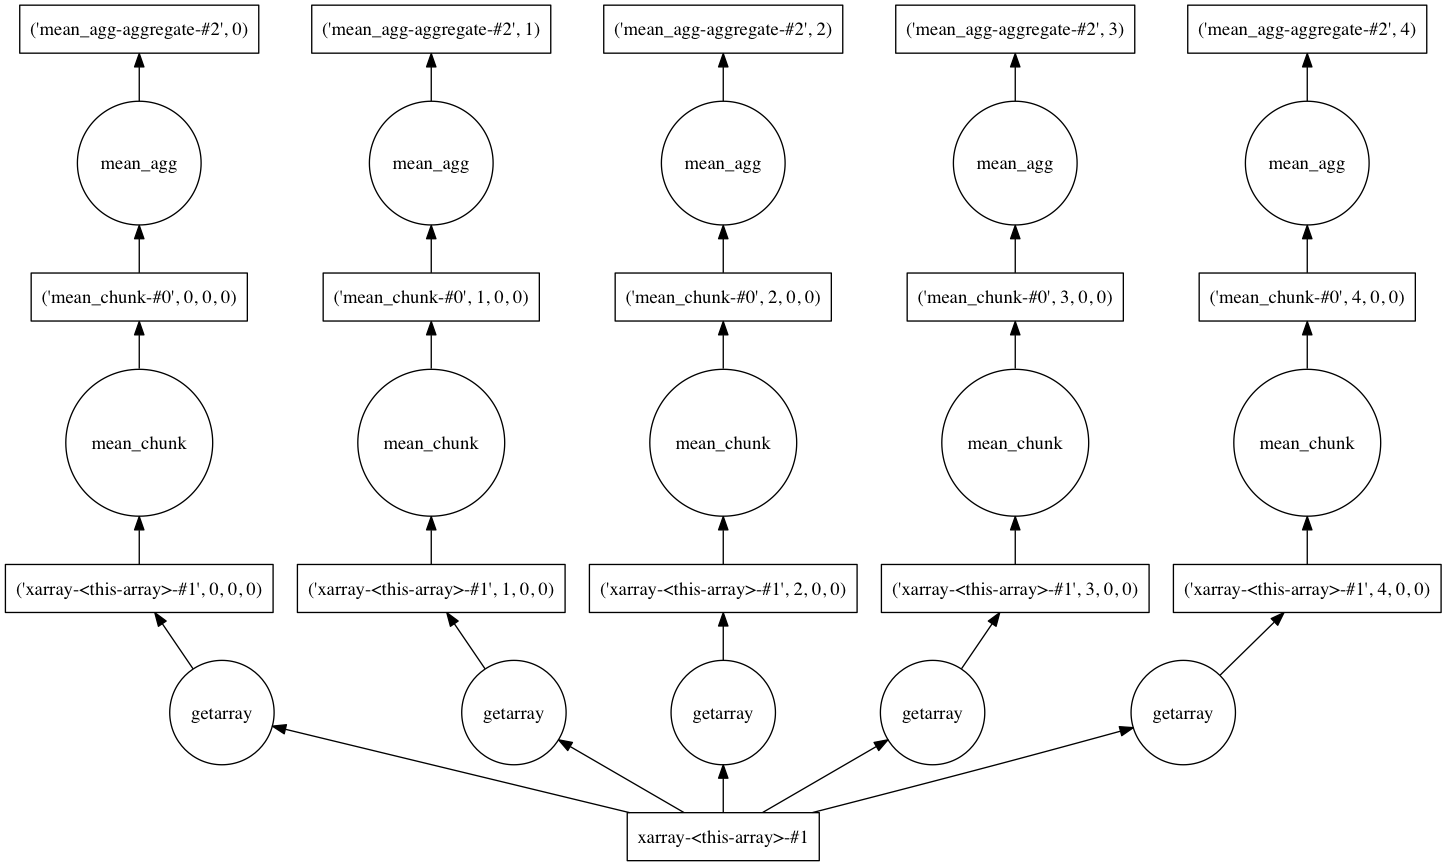

In [36]:
out.data.visualize()       # requires graphviz